<a href="https://colab.research.google.com/github/jmmzhng-pro/DSCI_631_Project/blob/main/01_Data_Acquisition_EDA/Additional_EDA_Autocorrelation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew
from statsmodels.tsa.stattools import adfuller

#import stock price data for S&P 500 index fund
df = pd.read_csv('/content/drive/MyDrive/DSCI 631 Assignments and Project/Project/Final Project/Datasets/StockPrice/^GSPC.csv')

# Run test
adf_result = adfuller(df['Close'])

# Parse test statistic and p value
print(f'ADF Test Statistic {adf_result[0]:.2f}')
print(f'P Value {adf_result[1]:.2f}')
if adf_result[1] > 0.05:
    print('Time series is not stationary. Time-dependent structure such as seasonality exists.')
else:
    print('Time series is stationary, p value < 0.05.')

ADF Test Statistic 0.56
P Value 0.99
Time series is not stationary. Time-dependent structure such as seasonality exists.


In [ ]:
#function to convert to pandas of string of time to date
from dateutil import parser
from datetime import datetime

def transform_to_date(pandas_object, col_name=''):
  if col_name == '':
    pandas_object = pandas_object.apply(parser.parse).apply(datetime.date)
    return pandas_object
  else:
    pandas_object[col_name] = pandas_object['col_name'].apply(parser.parse).apply(datetime.date)
    return pandas_object[col_name]

In [ ]:
#pre processing
df['Date'] = transform_to_date(df['Date'])

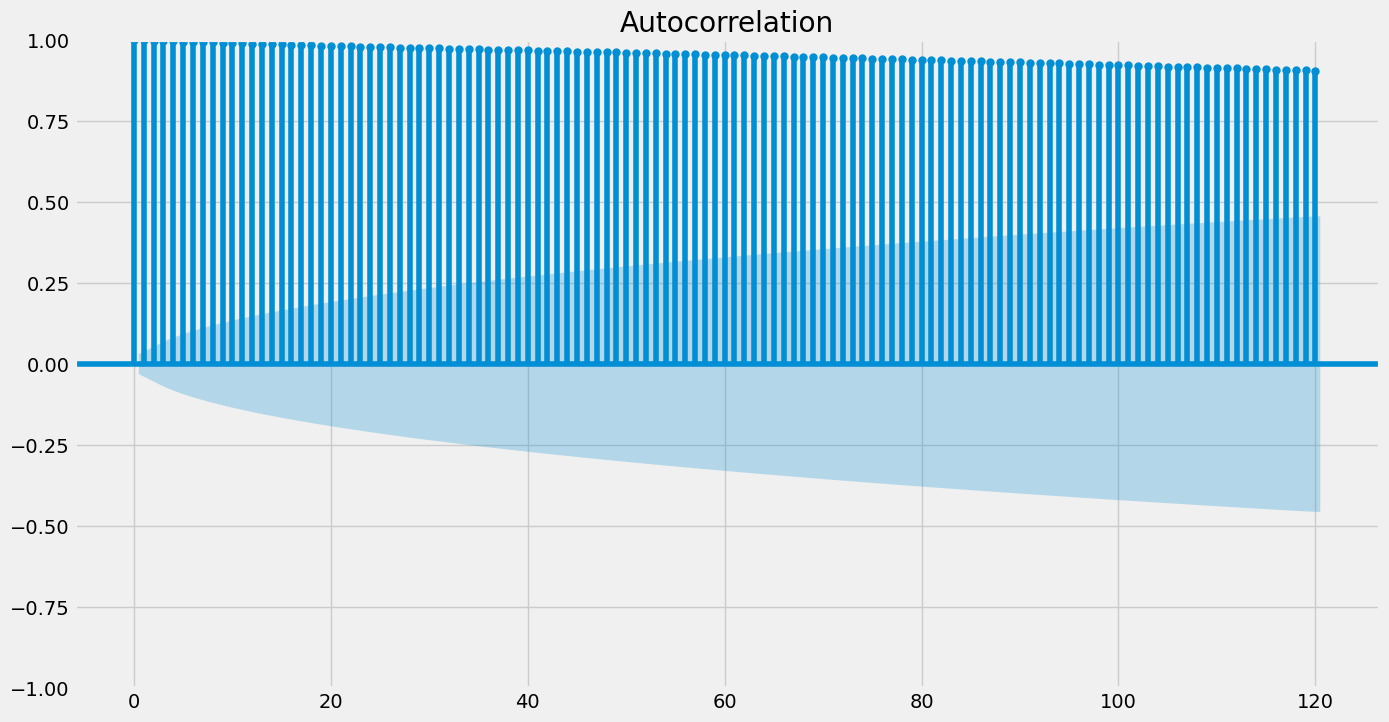

In [ ]:
# Autocorrelation
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(15, 8))
plot_acf(df['Close'], lags=120, ax=ax)
plt.show()

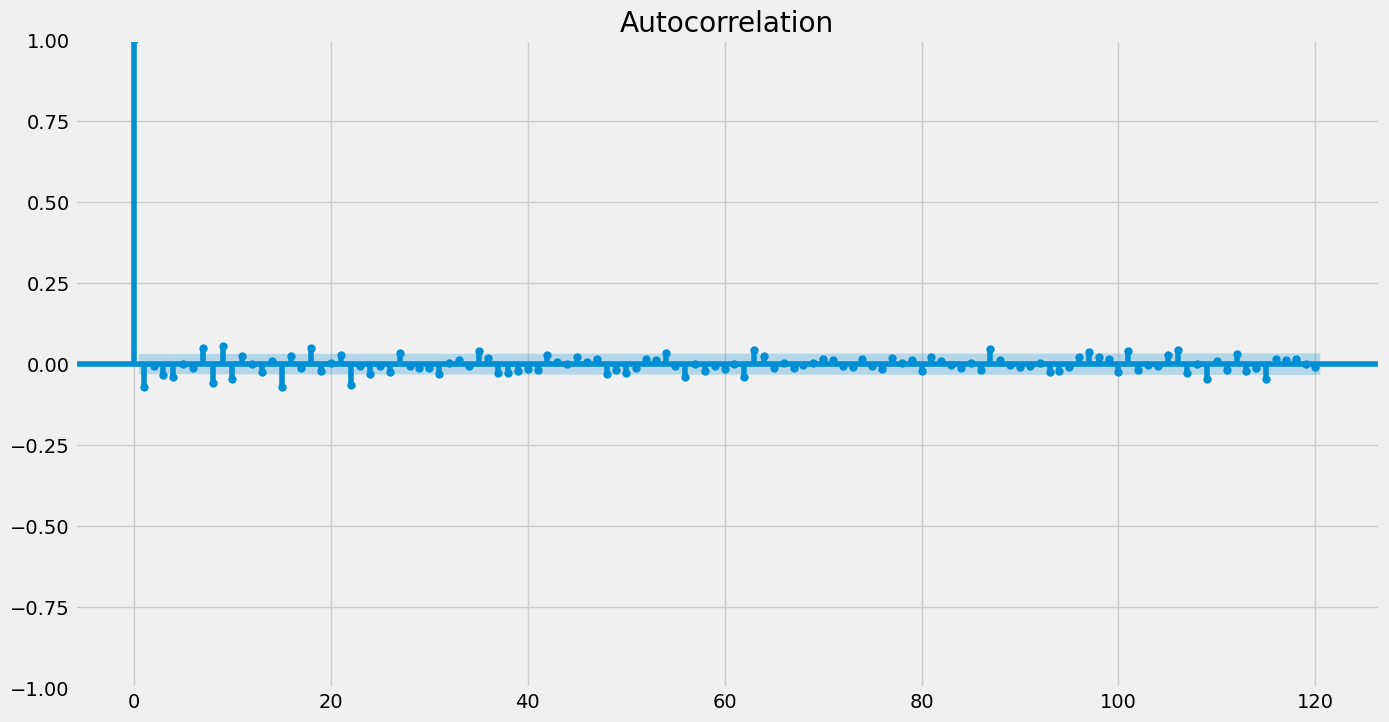

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
plot_acf(df['Close']-df['Open'], lags=120, ax=ax)
plt.show()

In [ ]:
#Above two plots show that stock price is highly auto-correlated. But daily changes in stock price is not highly autocorrelated
#This motivates the need for additional regressors and event based modelling, which we explore later on.

In [ ]:
#let's try to do some change point detection
%pip install ruptures

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 8.1 MB/s eta 0:00:00


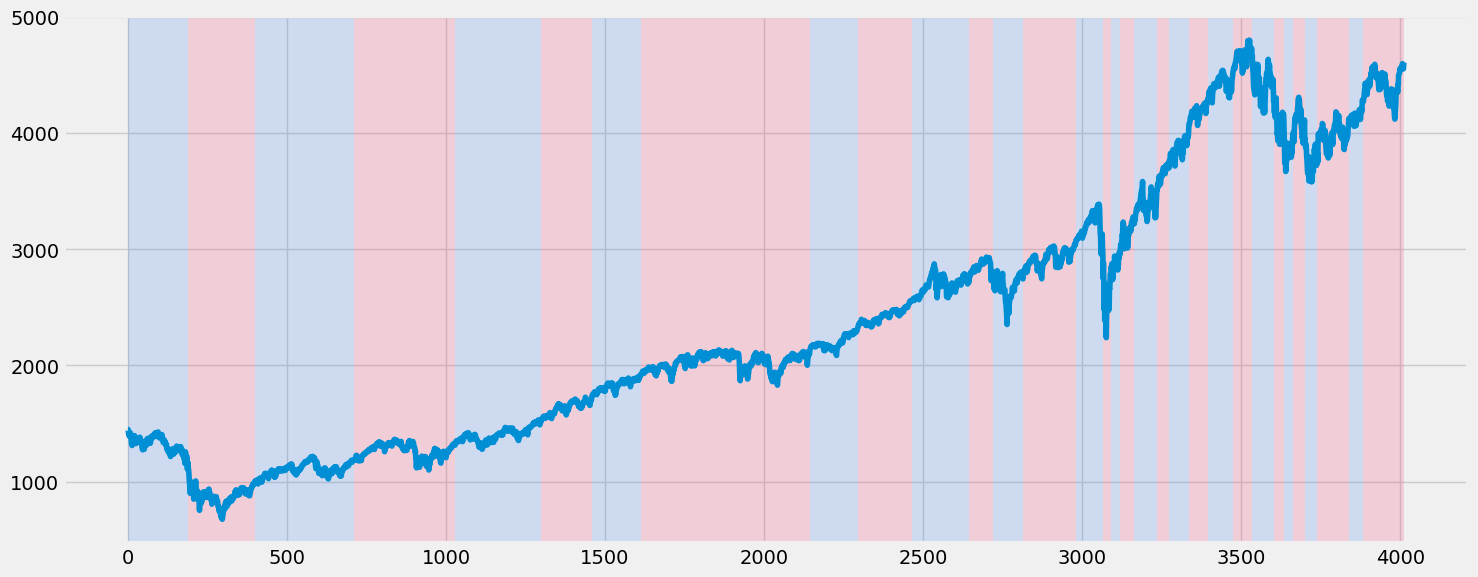

In [ ]:
# Penalized change point detection
import ruptures as rpt

points = np.array(df['Close'])

result = rpt.Pelt(model="rbf").fit_predict(points, pen=1)

# display
rpt.display(points, result, figsize=(15, 6))
plt.show()

In [ ]:
#get dates of change points
result_dates = df.iloc[[position - 1 for position in result]] #account for index 0
result_dates.Date

189     2008-10-01
399     2009-08-03
709     2010-10-25
1029    2012-02-01
1299    2013-03-01
1459    2013-10-17
1614    2014-06-02
2144    2016-07-08
2294    2017-02-10
2464    2017-10-13
2644    2018-07-03
2719    2018-10-18
2814    2019-03-08
2979    2019-10-31
3064    2020-03-05
3089    2020-04-09
3119    2020-05-22
3164    2020-07-28
3234    2020-11-04
3274    2021-01-04
3334    2021-03-31
3394    2021-06-25
3474    2021-10-19
3534    2022-01-13
3604    2022-04-26
3634    2022-06-08
3664    2022-07-22
3699    2022-09-12
3739    2022-11-07
3839    2023-04-03
3884    2023-06-07
4012    2023-12-08
Name: Date, dtype: object